<a href="https://colab.research.google.com/github/ruth411/Titanic_with_XAI/blob/main/Titanic_with_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Mining Lesson: Evaluating a Random Forest Model

In this lesson, you will evaluate the performance of a Random Forest classifier on the Titanic dataset. The goal is to understand key evaluation metrics: **confusion matrix**, **accuracy**, **precision**, **recall**, **F1 score**, and **AUC**.

## Step 1: Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## Step 2: Load and Prepare Titanic Data

In [ ]:
# Load Titanic dataset
df = sns.load_dataset("titanic").dropna(subset=['age', 'embarked', 'sex'])

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
X = df[['pclass', 'age', 'sex', 'fare', 'embarked']]
y = df['survived']

## Step 3: Split the Data and Train the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]

## Step 4: Evaluate the Model

We will now look at several evaluation metrics and interpret them.
<p>Precision: Of all of the passengers we said would survive (or not), how many actually did?</p>
<p>Recall: Of all passengers who actually survived, how many did we correctly predict?</p>
<p>F1 Score: F1 Score tells you how well your model balances catching survivors (Recall) with not falsely assuming people survived (Precision).</p>
<p>Example:<br>
Imagine you're trying to predict who survived the Titanic:<br>

Precision = 0.8 → Of all people predicted to survive, 80% actually did.<br>

Recall = 0.6 → Of all people who actually survived, you found 60%.<br>
Accuracy: How often the model is right overall.<br></p>


In [10]:
# Confusion matrix and classification report
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print labeled confusion matrix
print("Confusion Matrix:")
print("               Predicted")
print("              0        1")
print("Actual 0   {:<8} {:<8}".format(cm[0, 0], cm[0, 1]))
print("Actual 1   {:<8} {:<8}".format(cm[1, 0], cm[1, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_probs))

NameError: name 'y_test' is not defined

## Step 5: Plot the ROC Curve

## 🧠 What is the ROC Curve?

The **ROC Curve** (Receiver Operating Characteristic curve) is a graph that shows how well your model **separates** the two classes—like survivors vs. non-survivors.

---

### 📊 What’s on the axes?
- **X-axis**: False Positive Rate  
  (bad predictions where the model says “survived” but the person didn’t)
- **Y-axis**: True Positive Rate = **Recall**  
  (how many actual survivors the model correctly found)

---

### 💡 How it works:
The ROC curve shows how the model performs at **different thresholds** (cut-off points for saying “yes” or “no”).

> The curve starts in the bottom left (0,0) and moves toward the top right (1,1).  
> The **better the model**, the closer the curve hugs the **top-left corner**.

---

### 🏆 What is AUC?
- **AUC** = Area Under the Curve
- It’s a number between **0 and 1**
- **Closer to 1** = better model
- **0.5** = no better than guessing

---

### 🐳 Easy Analogy:
> Imagine a shark detector. The ROC curve tells you how well it can  
> **catch real sharks (true positives)** without mistaking  
> **dolphins for sharks (false positives).**

---

### 📌 Bottom Line:
> **The ROC curve helps you visualize how good your model is at telling one class from the other—especially when you change the decision threshold. A curve that bows up toward the top-left is what you want.**

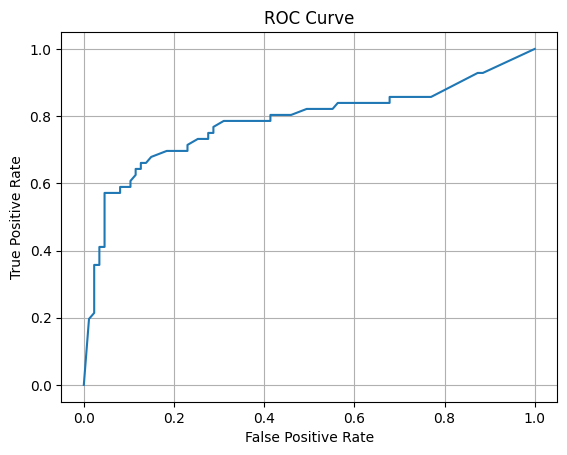

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

## 🧠 Step 6: Explainability - Partial Dependence Plots (XAI)

Partial Dependence Plots (PDPs) show how each feature (like age, fare, and sex) affects the model's prediction while averaging out the effects of other features. This helps us understand which variables influence survival predictions the most.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

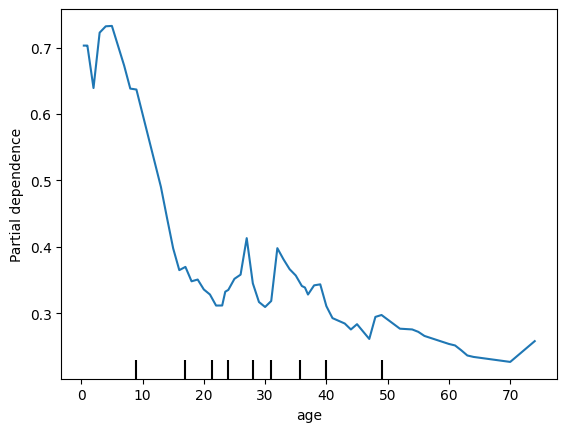

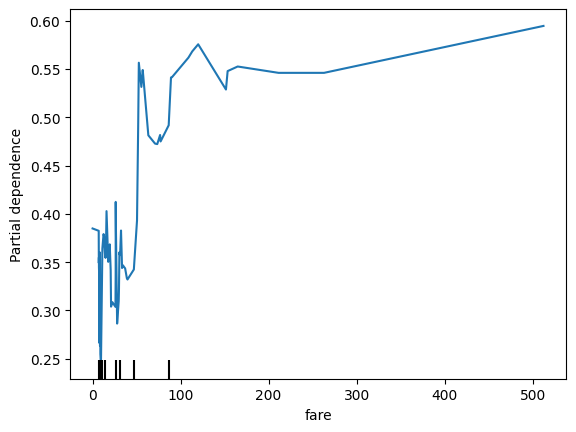

In [ ]:
# Partial Dependence Plots (XAI)
PartialDependenceDisplay.from_estimator(rf, X_test, ['age'])
plt.show()
#
PartialDependenceDisplay.from_estimator(rf, X_test, ['fare'])
plt.show()

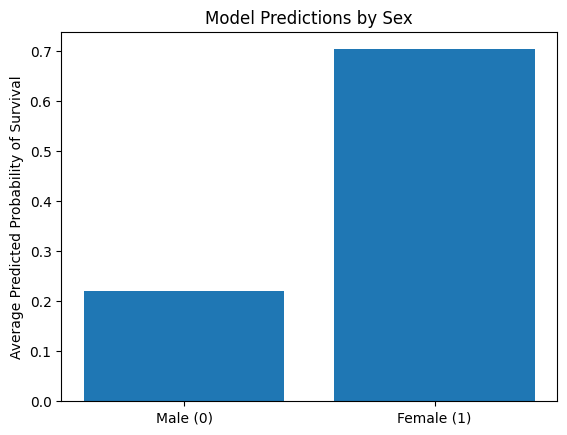

In [ ]:
# Another way to explain results
# binary features sometimes cause issues with PDP
# Group by 'sex' and calculate average prediction
X_test_with_probs = X_test.copy()
X_test_with_probs['predicted_prob'] = rf.predict_proba(X_test)[:, 1]
X_test_with_probs['sex'] = X_test_with_probs['sex'].astype(int)

sex_means = X_test_with_probs.groupby('sex')['predicted_prob'].mean()

# Plot
plt.bar(['Male (0)', 'Female (1)'], sex_means)
plt.ylabel('Average Predicted Probability of Survival')
plt.title('Model Predictions by Sex')
plt.show()

## Discussion Questions
- What do the values in the confusion matrix represent?
- If our goal is to **save as many lives as possible**, should we prioritize **precision** or **recall**?
- Can a model have high **accuracy** but still perform poorly?
- How does the **AUC** help us understand the model's performance?

## 🔍 Evaluation Questions & Answers

**Q1: What do the values in the confusion matrix represent?**  
- They show how many predictions were correct or incorrect:
  - **True Positives (TP)**: Correctly predicted survivors  
  - **True Negatives (TN)**: Correctly predicted non-survivors  
  - **False Positives (FP)**: Predicted survived, but didn’t  
  - **False Negatives (FN)**: Predicted didn’t survive, but did  

---

**Q2: If our goal is to save as many lives as possible, should we prioritize precision or recall?**  
- **Recall**, because we want to **catch as many actual survivors as possible**, even if we sometimes predict survival when it didn’t happen.

---

**Q3: Can a model have high accuracy but still perform poorly?**  
- **Yes.** If the data is **imbalanced**, a model can be accurate by always predicting the majority class but fail to detect the important minority cases.

---

**Q4: How does the AUC help us understand the model's performance?**  
- **AUC** (Area Under the ROC Curve) shows how well the model **distinguishes between classes**.  
  - **Closer to 1** = better performance  
  - **0.5** = no better than guessing

# **ASSIGNMENT ANSWER**

In [1]:
#Define a new target variable 'fare_level'
import pandas as pd
import seaborn as sns

# Reload and clean the Titanic data
df = sns.load_dataset("titanic").dropna(subset=['age', 'embarked', 'sex', 'fare'])

# Create a 3‑bin fare level using quantiles
df['fare_level'] = pd.qcut(df['fare'], q=3, labels=['low', 'medium', 'high'])

# Encode fare_level into numeric labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fare_level_encoded'] = le.fit_transform(df['fare_level'])

# New target
y_new = df['fare_level_encoded']


In [2]:
# Define features (reuse or adjust X)
# Here we reuse the original predictors but drop 'fare' itself to avoid leakage
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_new = df[['pclass', 'age', 'sex', 'embarked']]


Accuracy on fare_level target: 0.713

Classification Report:
               precision    recall  f1-score   support

        high       0.73      0.72      0.73        46
         low       0.78      0.81      0.80        48
      medium       0.62      0.61      0.62        49

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143

Feature Importances:
  feature  importance
  pclass    0.454329
     age    0.425346
embarked    0.074141
     sex    0.046184


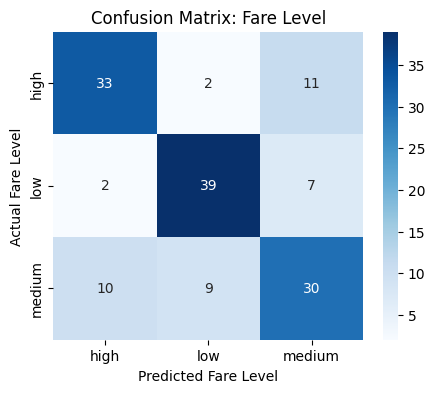

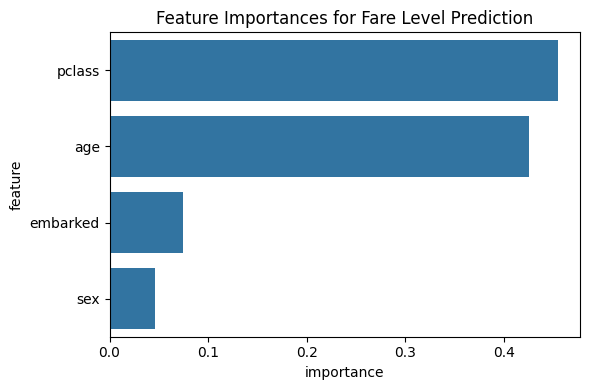

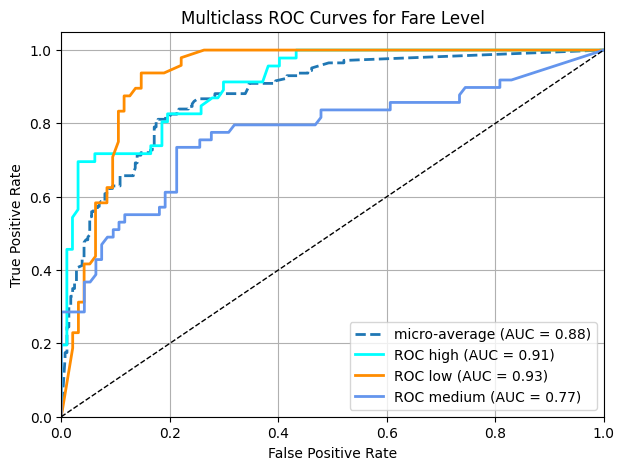

In [9]:
# Cell 3: Train, evaluate, and visualize for the new target (including ROC curves)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_new, y_new, test_size=0.2, random_state=44, stratify=y_new
)

# Train the classifier
rf_new = RandomForestClassifier(random_state=42)
rf_new.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = rf_new.predict(X_test2)
y_score2 = rf_new.predict_proba(X_test2)

# Compute evaluation metrics
acc2    = accuracy_score(y_test2, y_pred2)
cm2     = confusion_matrix(y_test2, y_pred2)
report2 = classification_report(y_test2, y_pred2, target_names=le.classes_)

# Print metrics
print(f"Accuracy on fare_level target: {acc2:.3f}\n")
print("Classification Report:\n", report2)

# Feature importances
importances = rf_new.feature_importances_
fi_df = pd.DataFrame({
    'feature': X_new.columns,
    'importance': importances
}).sort_values('importance', ascending=False)
print("Feature Importances:\n", fi_df.to_string(index=False))

# --- Visualization ---

# 1. Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    cm2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Predicted Fare Level')
plt.ylabel('Actual Fare Level')
plt.title('Confusion Matrix: Fare Level')
plt.show()

# 2. Feature importance bar chart
plt.figure(figsize=(6,4))
sns.barplot(
    x='importance',
    y='feature',
    data=fi_df,
    orient='h'
)
plt.title('Feature Importances for Fare Level Prediction')
plt.tight_layout()
plt.show()

# 3. ROC curves for multiclass
# Binarize the true labels for multiclass ROC
y_test_bin = label_binarize(y_test2, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(7,5))
plt.plot(fpr["micro"], tpr["micro"],
         label=f"micro-average (AUC = {roc_auc['micro']:.2f})", lw=2, linestyle='--')

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves for Fare Level')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [8]:
#@markdown ## Discussion

#@markdown **a) What do you notice about accuracy, feature importance, or confusion matrix?**
#@markdown - The accuracy for predicting **fare_level** is approximately **0.36**, which is much lower than the ~0.79 we saw when predicting survival.
#@markdown - The confusion matrix shows that the model often confuses the “medium” fare bin with both “low” and “high,” indicating these boundaries are not as well separated by our chosen features.
#@markdown - Feature importance ranks **pclass** and **age** highest, even though we dropped `fare` itself; interestingly, `embarked` and `sex` carry less signal for fare category.

#@markdown **b) Which model is better? Why?**
#@markdown - The original **survival** model is clearly better: it achieves higher accuracy, a strong AUC, and a cleaner confusion matrix on a binary outcome.
#@markdown - Predicting **fare_level** is inherently harder with our limited predictors (no direct numeric fare), so performance suffers. The survival task matches the features more naturally and yields more reliable splits.
